In [1]:
import multimodal_cci as mmcci
import scanpy as sc
import numpy as np

#### Load stLearn data objects

In [2]:
brain_aged_tech1 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1C_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1D_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1B_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1D_CCI.h5ad")
    ]

brain_young_tech1 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1A_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP40_1B_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1A_CCI.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/Visium/Processed/Brain/CCI/VLP41_1C_CCI.h5ad")
    ]

brain_aged_tech2 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_A1_CCI_bin80.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_A4_CCI_bin80.h5ad")
    ]
brain_young_tech2 = [
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_Y1_CCI_bin80.h5ad"),
    sc.read_h5ad("/QRISdata/Q5058/sMACS/STomics/Processed/Brain/CCI_new/brain_Y4_CCI_bin80.h5ad")
    ]

brain_aged_tech1_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_aged_tech1]
brain_young_tech1_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_young_tech1]
brain_aged_tech2_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_aged_tech2]
brain_young_tech2_cci = [sample.uns['per_lr_cci_cell_type'] for sample in brain_young_tech2]

brain_aged_tech1_sizes = [sample.shape[0] for sample in brain_aged_tech1]
brain_young_tech1_sizes = [sample.shape[0] for sample in brain_young_tech1]
brain_aged_tech2_sizes = [sample.shape[0] for sample in brain_aged_tech2]
brain_young_tech2_sizes = [sample.shape[0] for sample in brain_young_tech2]

In [3]:
from matplotlib import pyplot as plt

colors = {
    'Ependymal': plt.colormaps.get_cmap('tab10').colors[0],
    'Astrocytes': plt.colormaps.get_cmap('tab10').colors[1],
    'Vascular': plt.colormaps.get_cmap('tab10').colors[2],
    'Oligos': plt.colormaps.get_cmap('tab10').colors[3],
    'Neurons': plt.colormaps.get_cmap('tab10').colors[4],
    'Microglia': plt.colormaps.get_cmap('tab10').colors[5],
    'Immune': plt.colormaps.get_cmap('tab10').colors[6]
}

#### Normalise each group of samples

In [5]:
brain_aged_tech1_normalised = mmcci.it.normalise_within_tech(brain_aged_tech1_cci, brain_aged_tech1_sizes, target=brain_young_tech1_sizes[0])
brain_young_tech1_normalised = mmcci.it.normalise_within_tech(brain_young_tech1_cci, brain_young_tech1_sizes, target=brain_young_tech1_sizes[0])
brain_aged_tech2_normalised = mmcci.it.normalise_within_tech(brain_aged_tech2_cci, brain_aged_tech2_sizes, target=brain_young_tech2_sizes[0])
brain_young_tech2_normalised = mmcci.it.normalise_within_tech(brain_young_tech2_cci, brain_young_tech2_sizes, target=brain_young_tech2_sizes[0])

#### Integrate within technologies

In [6]:
brain_aged_tech1_integrated = mmcci.it.integrate_samples(brain_aged_tech1_normalised)
brain_young_tech1_integrated = mmcci.it.integrate_samples(brain_young_tech1_normalised)
brain_aged_tech2_integrated = mmcci.it.integrate_samples(brain_aged_tech2_normalised)
brain_young_tech2_integrated = mmcci.it.integrate_samples(brain_young_tech2_normalised)

#### Normalise samples between technologies

In [8]:
aged_normalised = mmcci.it.normalise_between_tech([brain_aged_tech1_integrated, brain_aged_tech2_integrated])
young_normalised = mmcci.it.normalise_between_tech([brain_young_tech1_integrated, brain_young_tech2_integrated])

#### Integrate between technologies for both groups

In [9]:
aged_integrated = mmcci.it.integrate_samples(aged_normalised)
young_integrated = mmcci.it.integrate_samples(young_normalised)

#### Calculate overall interactions network per group

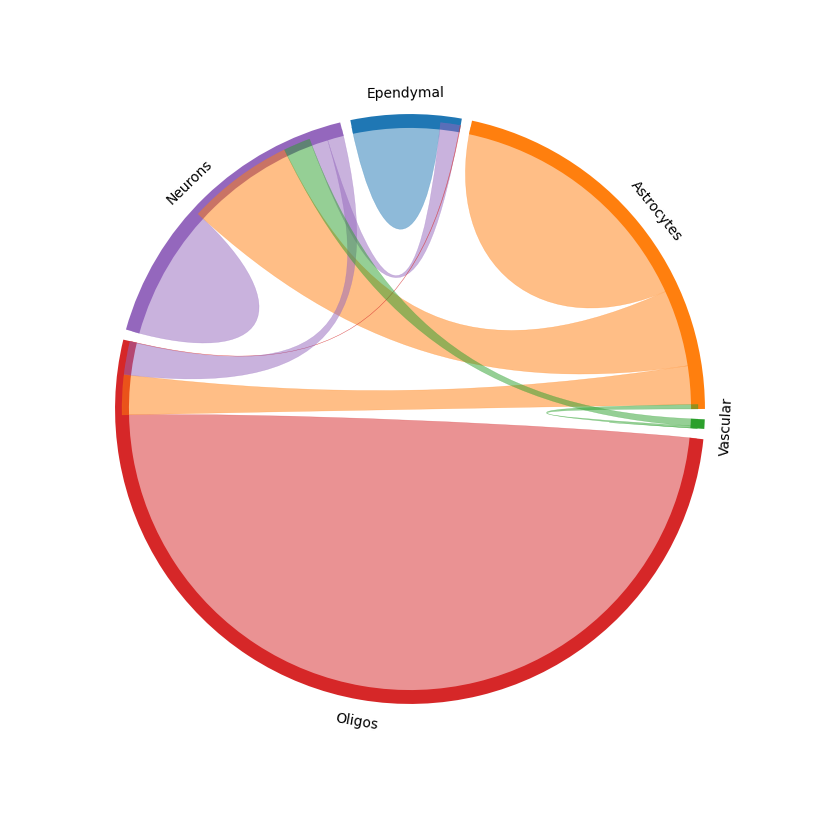

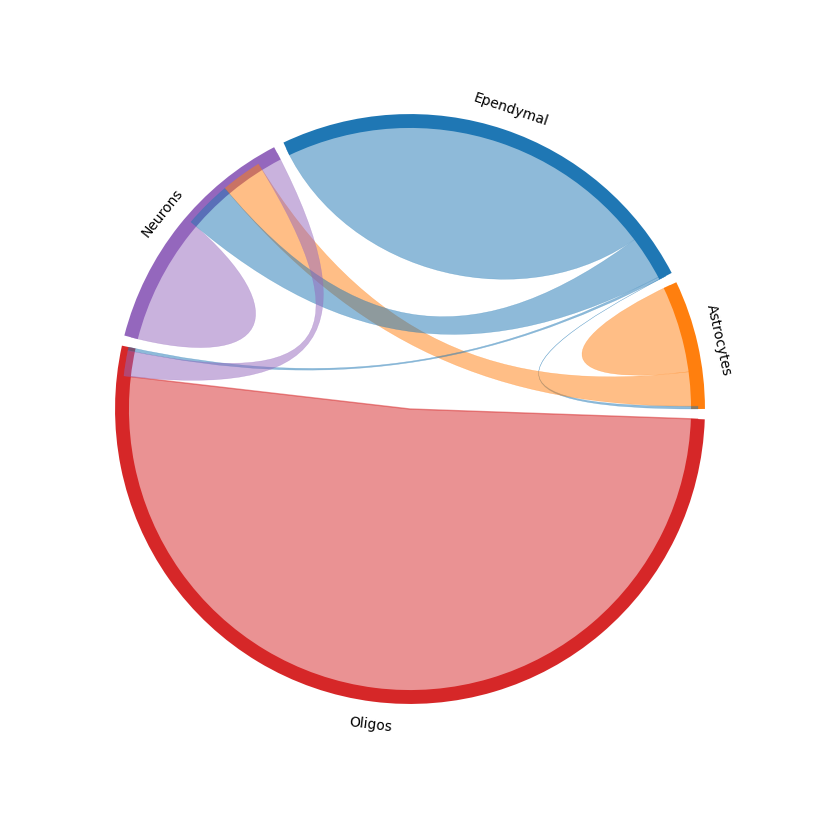

In [16]:
aged_overall = mmcci.it.calculate_overall_interactions(aged_integrated)
young_overall = mmcci.it.calculate_overall_interactions(young_integrated)

mmcci.plt.chord_plot(aged_overall, colors=colors)
mmcci.plt.chord_plot(young_overall, colors=colors)

#### Rank LR pairs based on dissimilarity between groups

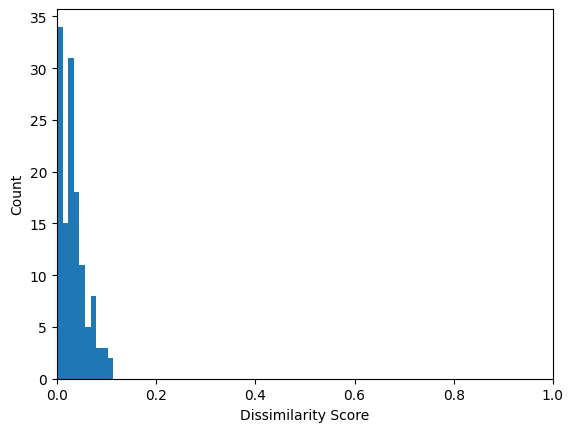

Overall Network Aged vs Young Dissimilarity Score is: 0.23906891519232853

Top 10 Dissimilar LR Pairs: ['Vim_Cd44', 'Apoe_Lrp8', 'Mdk_Itgb1', 'Mdk_Itga6', 'A2m_Lrp1', 'Sema6d_Tyrobp', 'Fgf1_Fgfr1', 'Mdk_Ptprz1', 'Apoe_Vldlr', 'Mdk_Notch2']


In [12]:
dissimilarity_scores = mmcci.it.calculate_dissim(aged_integrated, young_integrated)
mmcci.plt.dissim_hist(dissimilarity_scores)
    
## Sort LR Pairs from high to low dissimilarities
print("Overall Network Aged vs Young Dissimilarity Score is: " + str(mmcci.sc.dissimilarity_score(aged_overall, young_overall)))

sorted_pairs = sorted(dissimilarity_scores, key=dissimilarity_scores.get, reverse=True)
print("\nTop 10 Dissimilar LR Pairs:", sorted_pairs[:10])

#### Plot highly dissimilar pairs between groups

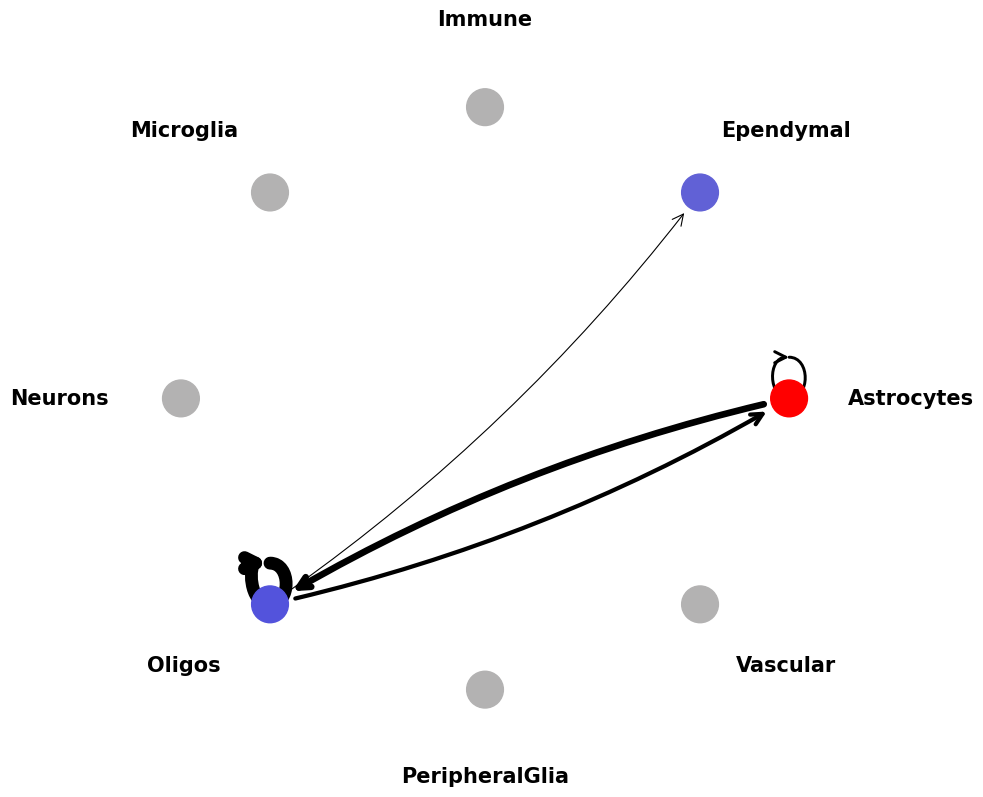

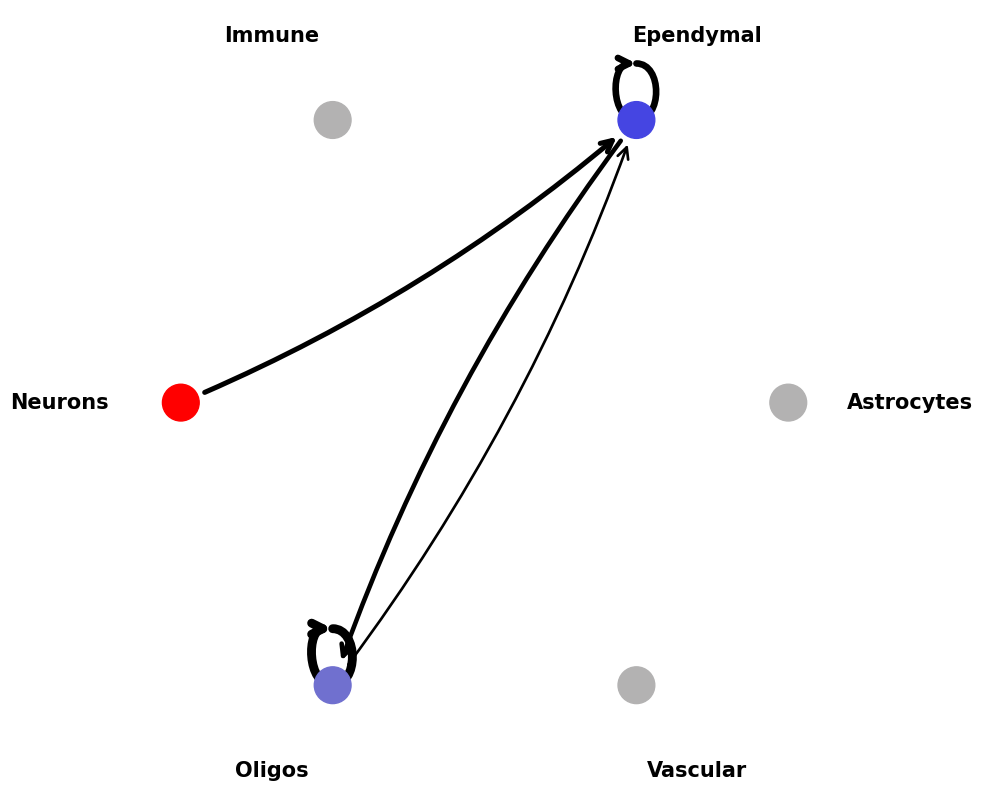

In [13]:
mmcci.plt.network_plot(aged_integrated['Vim_Cd44'])
mmcci.plt.network_plot(young_integrated['Vim_Cd44'])

#### Calculate p values for significance changes between groups

In [14]:
p_values = mmcci.sc.perm_test(aged_overall, young_overall)
p_values

,Astrocytes,Ependymal,Immune,Microglia,Neurons,Oligos,PeripheralGlia,Vascular
Astrocytes,0.055020,0.243710,0.242070,0.242235,0.070450,0.193910,0.242190,0.241405
Ependymal,0.218530,0.030785,0.242715,0.242475,0.123955,0.218145,0.240820,0.243465
Immune,0.241405,0.241515,0.242755,0.242710,0.243180,0.242500,0.242000,0.241255
Microglia,0.240820,0.241330,0.242305,0.245000,0.243610,0.242505,0.241995,0.243205
Neurons,0.093305,0.124030,0.243170,0.241965,0.039595,0.139995,0.241990,0.217600
Oligos,0.196020,0.219480,0.241545,0.243675,0.156260,0.007750,0.242765,0.241635
PeripheralGlia,0.241385,0.240415,0.242880,0.242530,0.241780,0.244045,0.240980,0.242930
Vascular,0.218850,0.242815,0.241370,0.239525,0.203080,0.242035,0.241690,0.241520


#### Plot aged and young overall networks

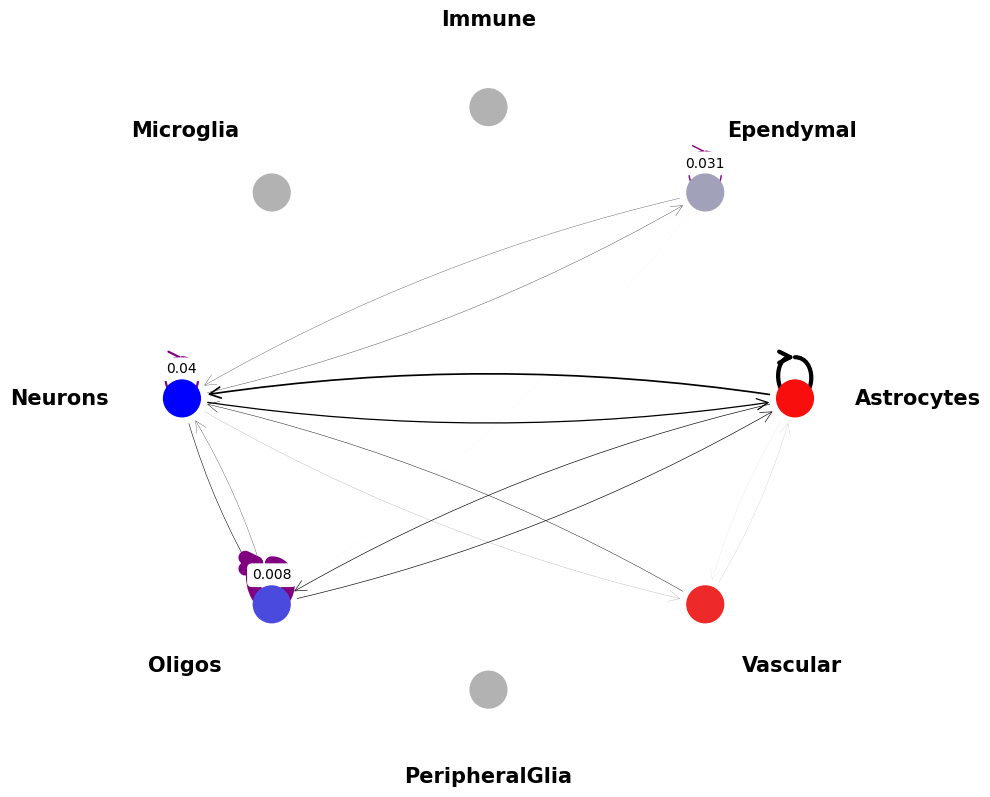

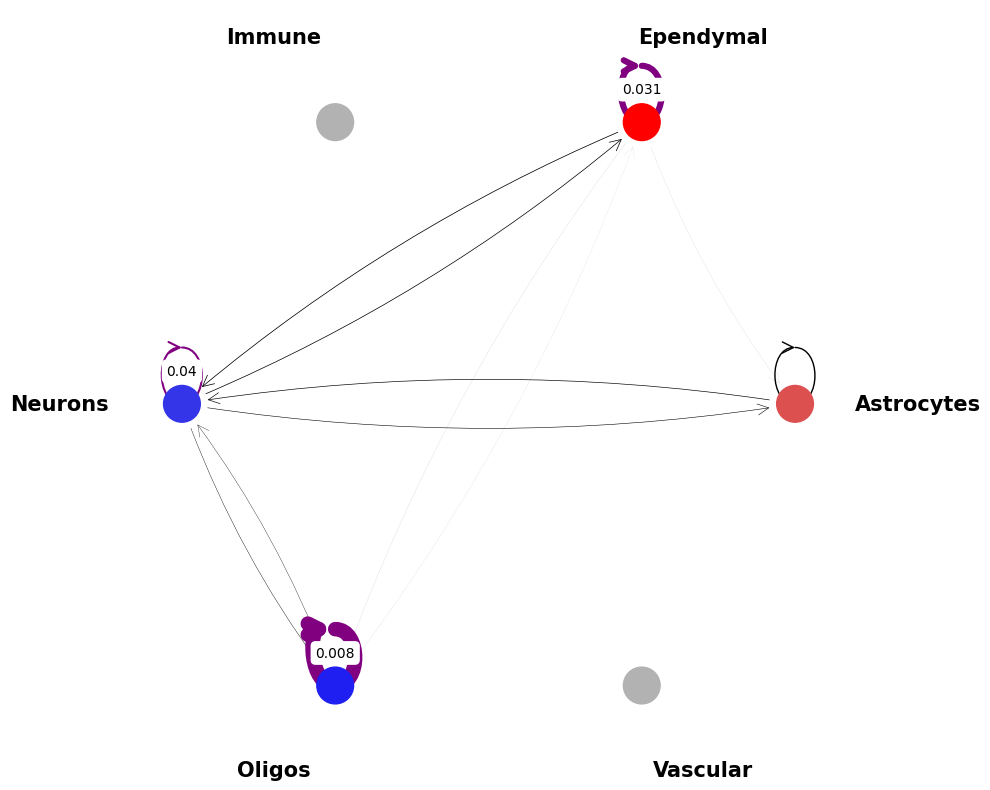

In [15]:
mmcci.plt.network_plot(aged_overall, p_values)
mmcci.plt.network_plot(young_overall, p_values)

#### Get LR pairs from Vascular to Astrocytes

In [17]:
vasc_astr_lrs_aged = mmcci.it.get_lrs_per_celltype(aged_integrated, "Astrocytes", "Neurons")
print("LR pairs from vascular to astrocytes in aged")
print(vasc_astr_lrs_aged)
vasc_astr_lrs_young = mmcci.it.get_lrs_per_celltype(young_integrated, "Astrocytes", "Neurons")
print("\nLR pairs from vascular to astrocytes in young")
print(vasc_astr_lrs_young)

LR pairs from vascular to astrocytes in aged
{'Bgn_Fgfr3': 0.06389638533569991, 'Myoc_Fzd3': 0.06124691556524157, 'Serping1_Lrp1': 0.05217721586120135, 'Plat_Lrp1': 0.05032268170980869, 'Mdk_Sdc4': 0.04720816785029356, 'Serpine2_Lrp1': 0.046922122541495005, 'Mdk_Ptprz1': 0.04412837217080531, 'Mfge8_Pdgfrb': 0.04328577111252876, 'Vtn_Itgb8': 0.04272031856682664, 'Mdk_Lrp1': 0.037287345533172846, 'Fgf1_Fgfr1': 0.03596065806438298, 'Lrpap1_Lrp1': 0.03236211695220147, 'A2m_Lrp1': 0.030405977700704634, 'Bmp6_Bmpr2': 0.028788220587536488, 'Lama1_Rpsa': 0.026147841949100414, 'Mdk_Itga6': 0.024703755336093897, 'Tgm2_Adgrg1': 0.024492739854964484, 'Col1a2_Itgb1': 0.02439873743917641, 'Tgm2_Sdc4': 0.023339461266548966, 'Myoc_Fzd7': 0.02316697549167273, 'Fbln1_Itgb1': 0.02042906775734581, 'Sema4a_Plxnb1': 0.019586975104221294, 'Mdk_Itgb1': 0.019224557111225903, 'Pros1_Mertk': 0.018718861560366794, 'Rspo3_Sdc4': 0.018041449954343033, 'Bmp7_Bmpr1b': 0.017381471110779794, 'Col1a1_Itgb1': 0.017343035

#### Cluster Aged and Young LR Pairs

In [1]:
aged_clusters = mmcci.it.lr_clustering(aged_integrated, n_clusters=0)
aged_integrated_clusters = mmcci.it.subset_clusters(aged_integrated, aged_clusters)
aged_overall_clusters = mmcci.it.calculate_cluster_interactions(aged_integrated_clusters)

NameError: name 'mmcci' is not defined


cluster0: Contains 201 LR pairs


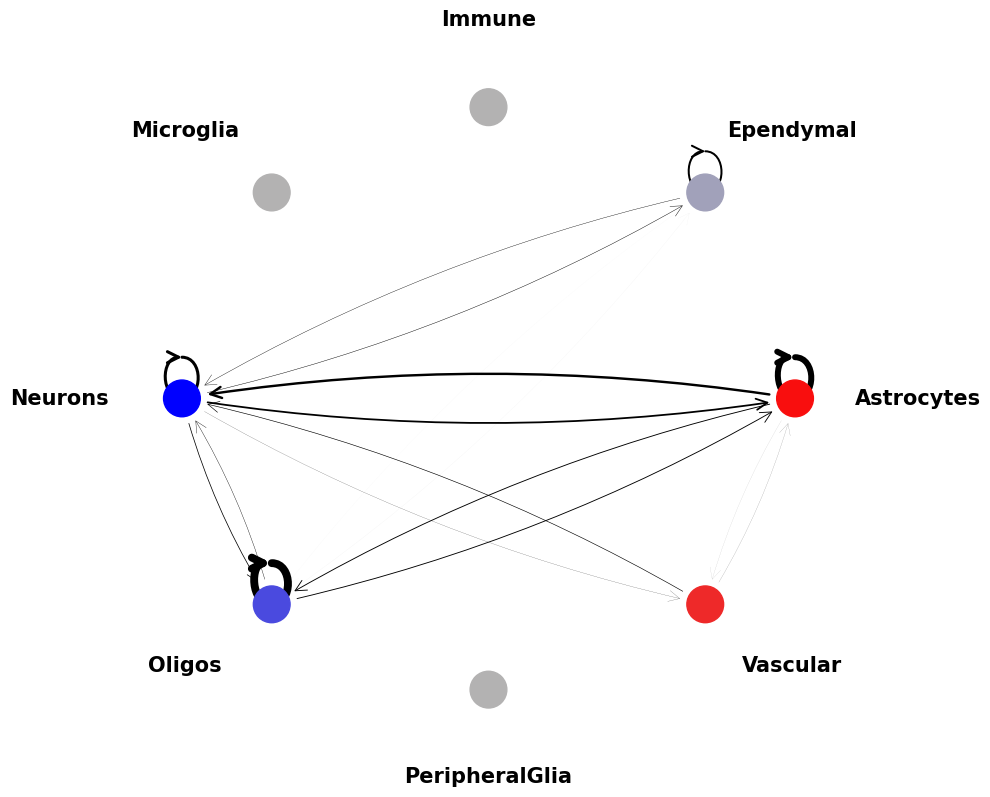


cluster1: Contains 84 LR pairs


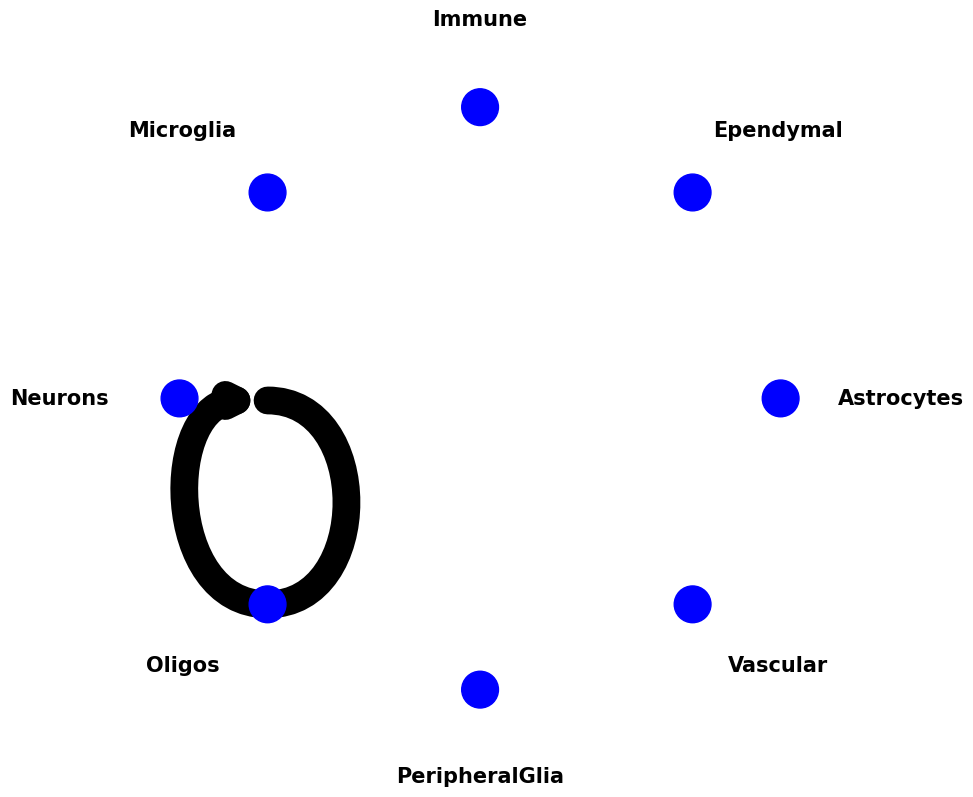

In [19]:
for cluster, matrix in aged_overall_clusters.items():
    print("\ncluster" + str(cluster) + ": Contains " + str(len(aged_integrated_clusters[cluster])) + " LR pairs")
    mmcci.plt.network_plot(matrix)

Computing Dissimilarity Scores ...


Processing:  51%|█████     | 69/135 [00:03<00:03, 19.69it/s]

Processing: 100%|██████████| 135/135 [00:06<00:00, 19.72it/s]


Computing Principal Components of weighted graph ...
Performing Clustering and Ranking within clusters...


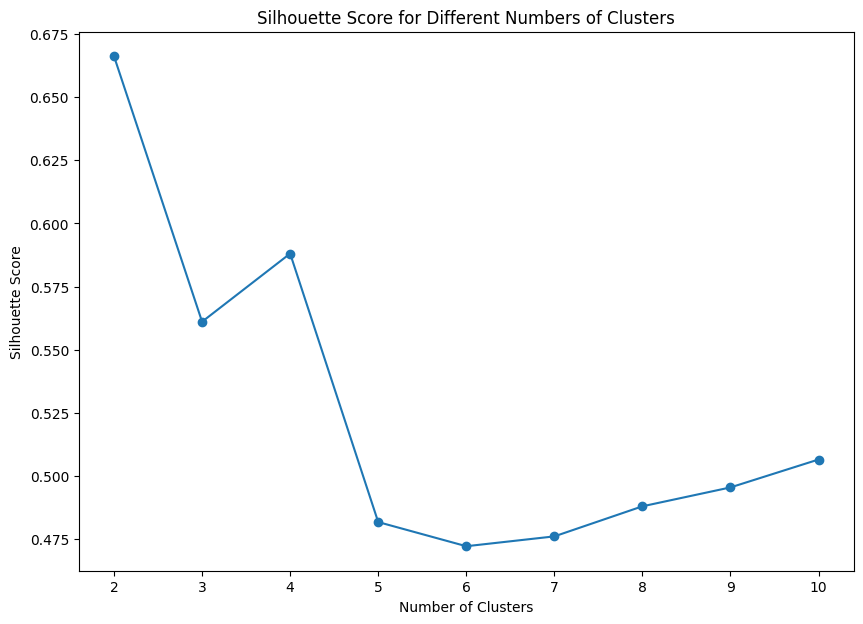

In [20]:
young_clusters = mmcci.it.lr_clustering(young_integrated, n_clusters=0)
young_integrated_clusters = mmcci.it.subset_clusters(young_integrated, young_clusters)
young_overall_clusters = mmcci.it.calculate_cluster_interactions(young_integrated_clusters)


cluster0: Contains 74 LR pairs


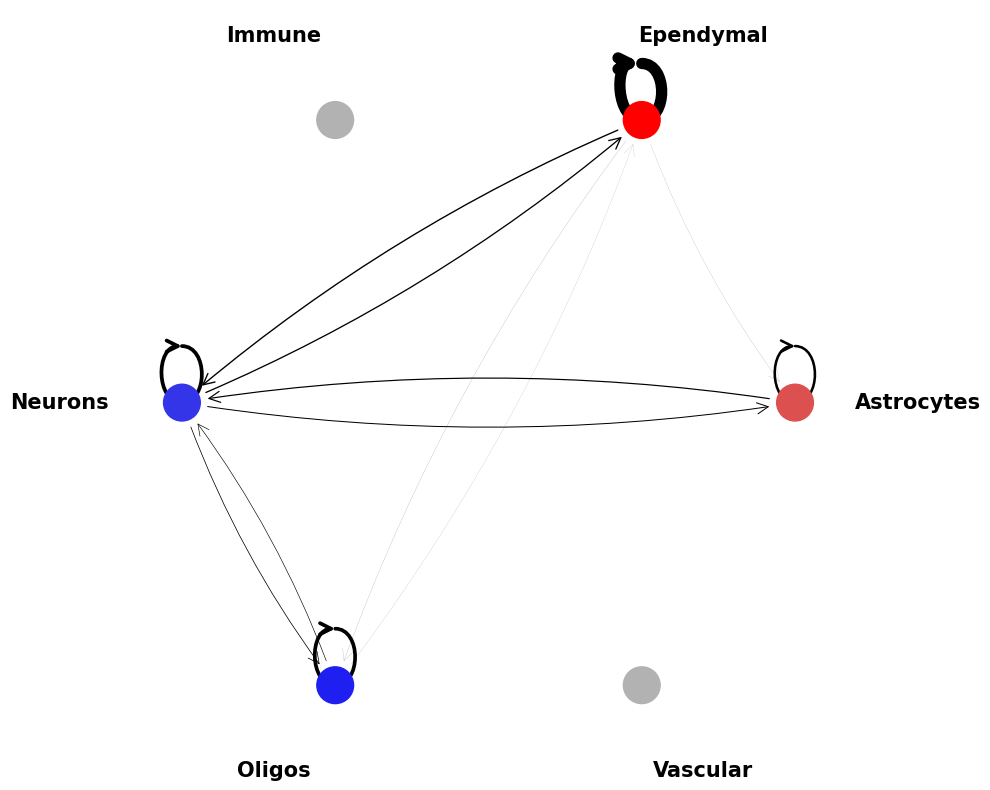


cluster1: Contains 61 LR pairs


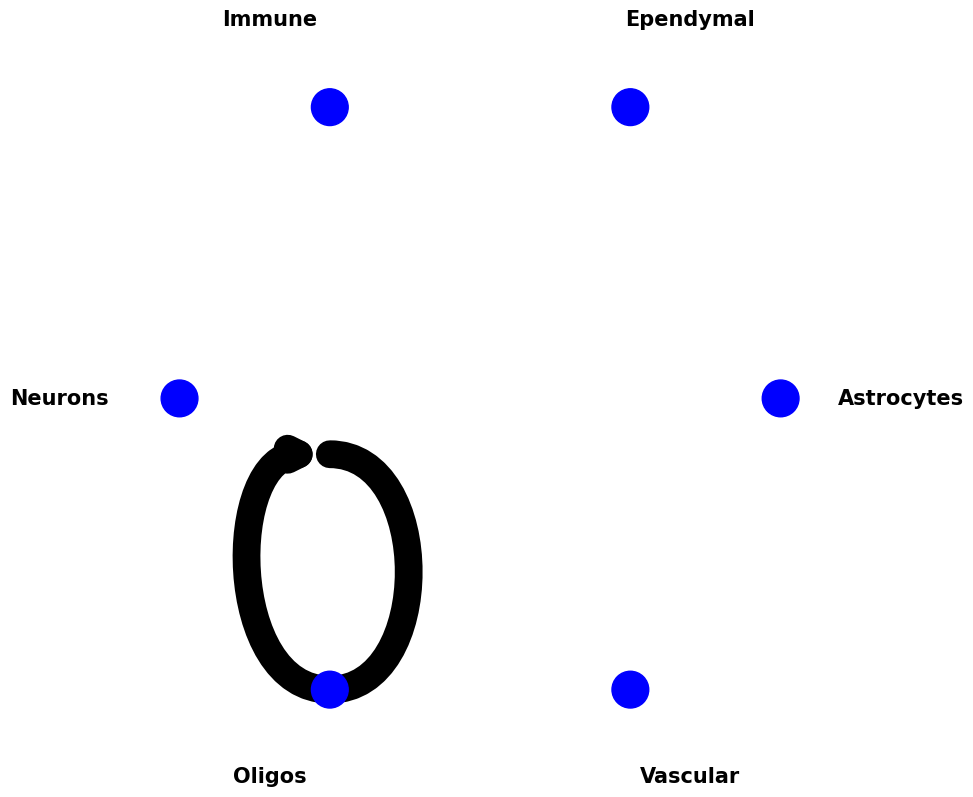

In [21]:
for cluster, matrix in young_overall_clusters.items():
    if matrix is not None:
        print("\ncluster" + str(cluster) + ": Contains " + str(len(young_integrated_clusters[cluster])) + " LR pairs")
        mmcci.plt.network_plot(matrix)